<a href="https://colab.research.google.com/github/alexei-clay/SCEC_2019/blob/master/Alexei_Copy_of_UseIT2019_ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy 
import scipy
import matplotlib.pyplot as pyplot
import pandas
import requests
import io
import contextlib
import seaborn

1. Perform an exploratory analysis of the data set and provide suggestions on machine learning approaches we can apply to the data set.  
  **Task**: Provide 3  (as a group) different ways to approach the problem. Think about this in terms of general concepts and not specific algorithms. Provide the class of problem (regression, classification, clustering) and the inputs and outputs.  Im available to answer questions and help with the discussion. 
  
  
    Example: 
        Input data: 
            Features: Open interval (time since last rupture for Mw > 7) data on 6 subsections of 
                      the San Andreas.
            Labels: Binary (0 or 1) indicating whether an earthquake occurs during the next time 
                    interval.
        Output Data: Binary classification (0 or 1) on whether next interval constains a rupture anywhere.
        Algorithm Type: Binary Classification 
                  - Logistic Regression
                  - Random Forest
                  - Support Vector Machine
                  - Decision Tree
                  
 2. Share data exploration in small informal presentation in your own notebooks. You can use this notebook as a guide on how to structure an exploratory data analysis. Try to address different questions about the data set that might be useful to help answer number Task (1).


## Helping Functions

This cell contains functions will be useful within this notebook.

---



In [0]:
def load_csv_from_web(url):
  """
  Loads a .csv file into Pandas DataFrame.
  
  Args:
    url (str): URL containing name of .csv file
    
   Returns:
    df (pandas.DataFrame)
  """
  with contextlib.closing(requests.get(url, stream=True)) as response:
    stream = io.StringIO(response.content.decode('utf-8'))
    df = pandas.read_csv(stream)
  return df

## Download Data

Download the previous year's RSQSim data to get familiar with python and the data we are working with for the summer.

In [0]:
df=load_csv_from_web('http://hypocenter.usc.edu/research/UseIT2019_ML_Data/eqdata.csv')
df.head()

,Index,San Andreas (Carrizo) rev,San Andreas (Cholame) rev,San Andreas (Mojave S),San Andreas (Coachella) rev,San Jacinto (Anza) rev,Garlock (West)
0,0,2,2,11,3,0,12
1,1,3,3,12,4,1,13
2,2,4,4,13,5,2,14
3,3,5,5,14,6,3,15
4,4,6,6,15,7,4,16


In [0]:
df.loc[[5], ['San Andreas (Mojave S)']]

,San Andreas (Mojave S)
5,16


We notice there are some unwanted columns (Index), and we'd like to rename the columns to make them easier to work with.

In [0]:
X=df.set_index("Index")
X=X.rename(columns={df.columns[1]:'Carrizo', df.columns[2]:'Cholame', df.columns[3]:'Mojave', df.columns[4]:'Coachella', df.columns[5]:'Anza', df.columns[6]:'Garlock'})
X.head()

,Carrizo,Cholame,Mojave,Coachella,Anza,Garlock
Index,,,,,,
0,2,2,11,3,0,12
1,3,3,12,4,1,13
2,4,4,13,5,2,14
3,5,5,14,6,3,15
4,6,6,15,7,4,16


Now we can access the values in the columns easily by their names.  For example, ``` X.Carrizo ```  or  ```X.Garlock```. 
We can still access a column by index using ```X.iloc[: ,0]```.

## Example Plots

In this section, I show some plots visualizing aspects of the data sets. Our task here is to expand on this to investigate different aspects of the data set. These plots show the distributions of open intervals in the data set and some simple correlations between sections. 

Some ideas for investigating:
1. What is the frequency of observing open-intervals longer than some time value? These are going to be different for each fault section.
2. Look into different correlations between all of the sections on the fault.
3. What other aspects of the data might be important for predicting the next open interval? 
4. Is there any other way you would think to visualize this data set?

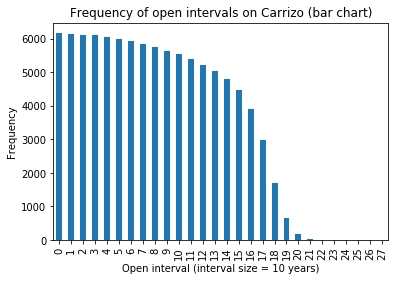

In [0]:
# PLOT 1 (PANDAS)
# Frequency of open intervals on Carrizo (bar chart)
X.Carrizo.value_counts().sort_index().plot.bar()
pyplot.title("Frequency of open intervals on Carrizo (bar chart)")
pyplot.xlabel("Open interval (interval size = 10 years)")
pyplot.ylabel("Frequency")
pyplot.show()

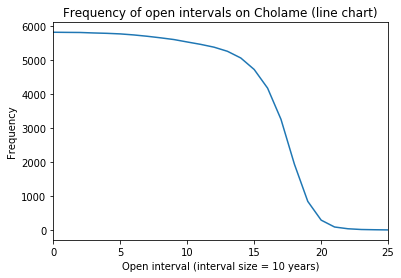

In [0]:
# PLOT 2 (PANDAS)
# Frequency of open intervals on Cholame (line chart)
X.Cholame.value_counts().sort_index().plot.line()
pyplot.title("Frequency of open intervals on Cholame (line chart)")
pyplot.xlabel("Open interval (interval size = 10 years)")
pyplot.ylabel("Frequency")
pyplot.show()

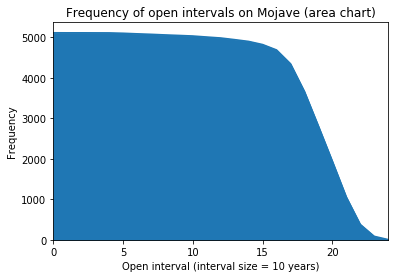

In [0]:
# PLOT 3 (PANDAS)
# Frequency of open intervals on Mojave (area chart)
X.Mojave.value_counts().sort_index().plot.area()
pyplot.title("Frequency of open intervals on Mojave (area chart)")
pyplot.xlabel("Open interval (interval size = 10 years)")
pyplot.ylabel("Frequency")
pyplot.show()

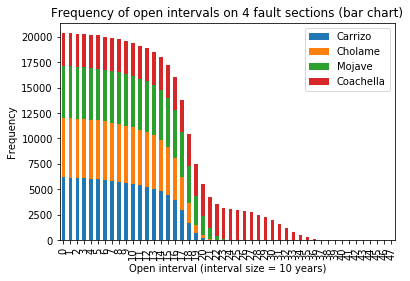

In [0]:
# PLOT 4 (PANDAS)
# Frequency of open intervals on 4 fault sections (bar chart)
pandas.concat([X['Carrizo'].value_counts().sort_index(), 
			X['Cholame'].value_counts().sort_index(), 
			X['Mojave'].value_counts().sort_index(), 
			X['Coachella'].value_counts().sort_index()], axis=1).plot.bar(stacked=True)
pyplot.title("Frequency of open intervals on 4 fault sections (bar chart)")
pyplot.xlabel("Open interval (interval size = 10 years)")
pyplot.ylabel("Frequency")
pyplot.show()

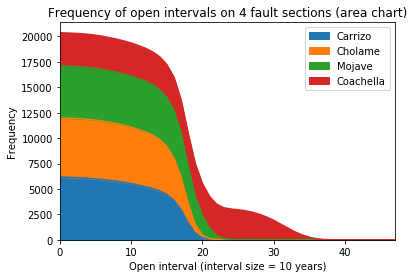

In [0]:
# PLOT 5 (PANDAS)
# Frequency of open intervals on 4 fault sections (area chart)
pandas.concat([X['Carrizo'].value_counts().sort_index(), 
			X['Cholame'].value_counts().sort_index(), 
			X['Mojave'].value_counts().sort_index(), 
			X['Coachella'].value_counts().sort_index()], axis=1).plot.area()
pyplot.title("Frequency of open intervals on 4 fault sections (area chart)")
pyplot.xlabel("Open interval (interval size = 10 years)")
pyplot.ylabel("Frequency")
pyplot.show()

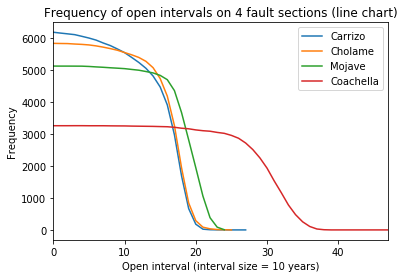

In [0]:
# PLOT 6 (PANDAS)
# Frequency of open intervals on 4 fault sections (line chart)
pandas.concat([X['Carrizo'].value_counts().sort_index(), 
			X['Cholame'].value_counts().sort_index(), 
			X['Mojave'].value_counts().sort_index(), 
			X['Coachella'].value_counts().sort_index()], axis=1).plot.line()
pyplot.title("Frequency of open intervals on 4 fault sections (line chart)")
pyplot.xlabel("Open interval (interval size = 10 years)")
pyplot.ylabel("Frequency")
pyplot.show()

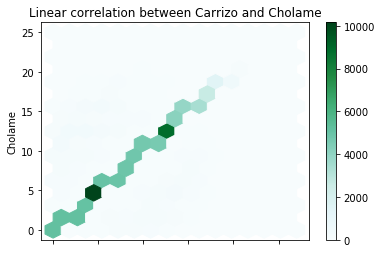

In [0]:
# PLOT 7 (PANDAS)
# Correlation between Carrizo and Cholame

# The dark diagonal line in the following chart is at nearly 45 degrees to the X axis, which implies that X = Y.
# So, there are a lot of records in the dataset in which the Carrizo and Cholame have the same number.
# This shows that the Carrizo and Cholame are 1) strongly correlated and 2) often rupture together (i.e. in the same time interval)
X.plot.hexbin(x='Carrizo', y='Cholame', gridsize=15)
pyplot.title("Linear correlation between Carrizo and Cholame")
pyplot.show()

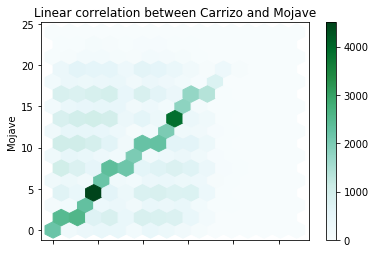

In [0]:
# PLOT 8 (PANDAS)
# Correlation between Carrizo and Mojave

# The Carrizo and Mojave are linearly correlated and rupture together
# The correlation between the Carrizo and Mojave is slightly less than that of Carrizo-Cholame
X.plot.hexbin(x='Carrizo', y='Mojave', gridsize=15)
pyplot.title("Linear correlation between Carrizo and Mojave")
pyplot.show()

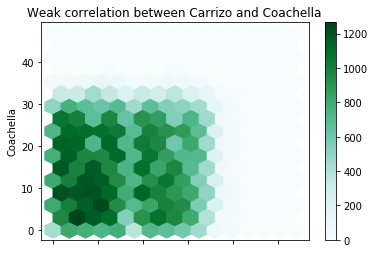

In [0]:
# PLOT 9 (PANDAS)
# Correlation between Carrizo and Coachella

# The following graph shows that open intervals on the Carrizo and Coachella are distributed pretty evenly.
# This indicates that there is no strong correlation (or none at all) between the Carrizo and Coachella.
X.plot.hexbin(x='Carrizo', y='Coachella', gridsize=15)
pyplot.title("Weak correlation between Carrizo and Coachella")
pyplot.show()

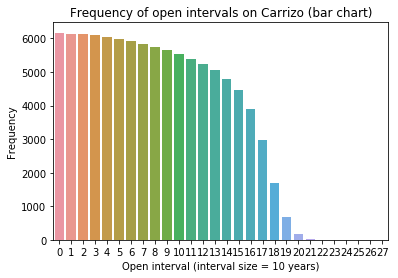

In [0]:
# PLOT 10 (SEABORN)
# Frequency of open intervals on Carrizo (bar chart)

# This chart uses a library called Seaborn.
# Everything else so far has used the Pandas library.
# This Seaborn chart is equivalent to Pandas's X.Carrizo.value_counts().sort_index().plot.bar()
seaborn.countplot(X['Carrizo'])
pyplot.title("Frequency of open intervals on Carrizo (bar chart)")
pyplot.xlabel("Open interval (interval size = 10 years)")
pyplot.ylabel("Frequency")
pyplot.show()

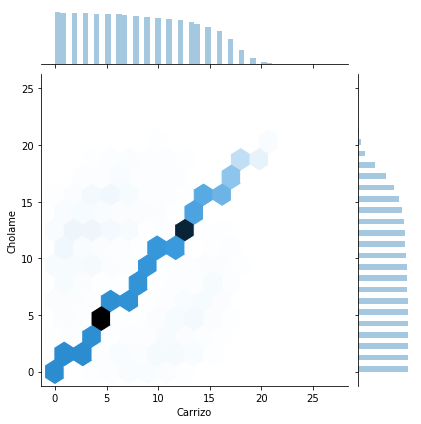

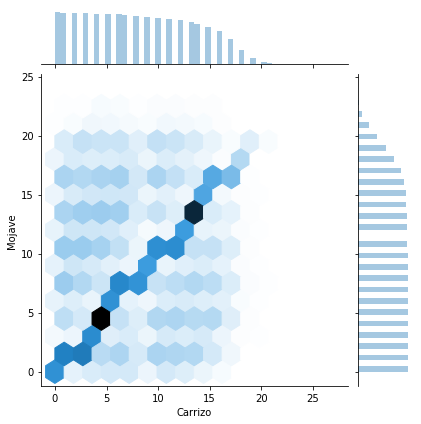

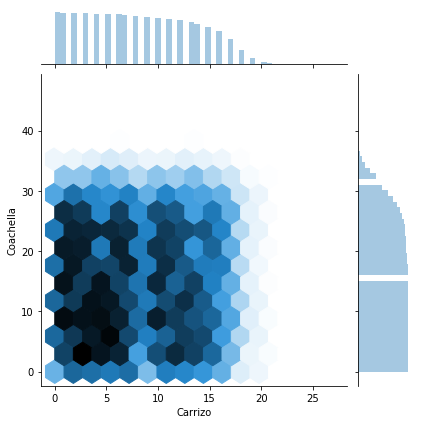

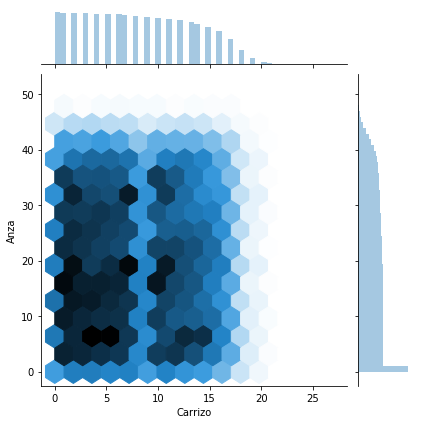

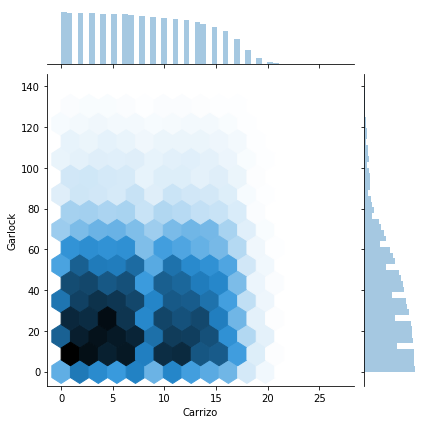

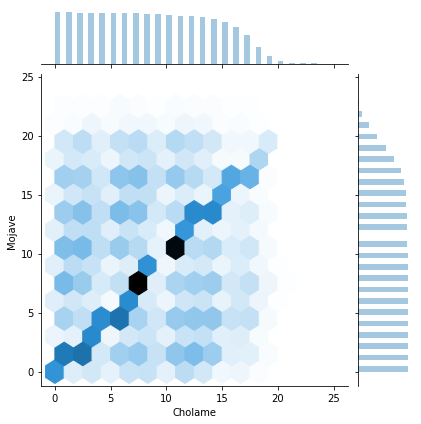

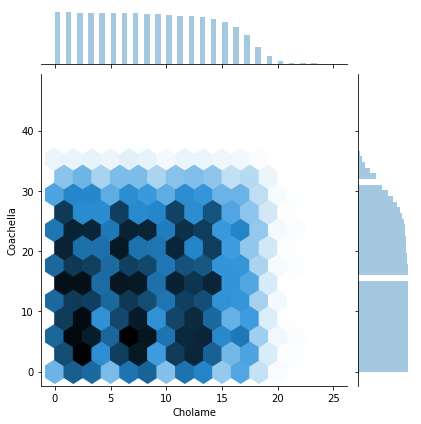

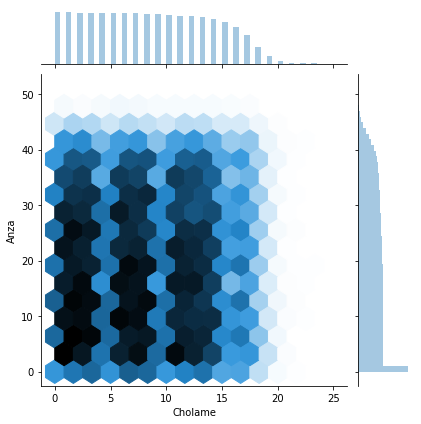

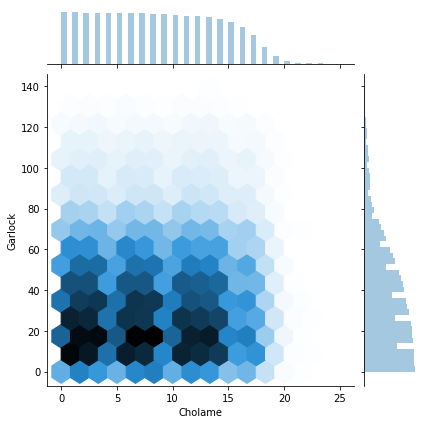

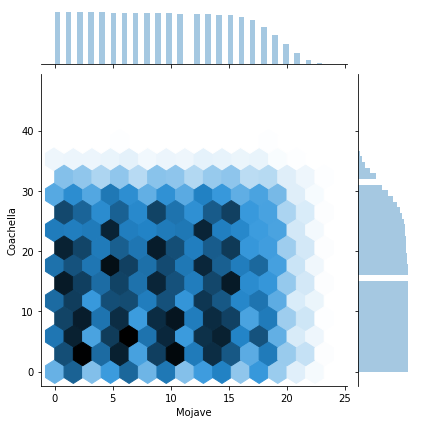

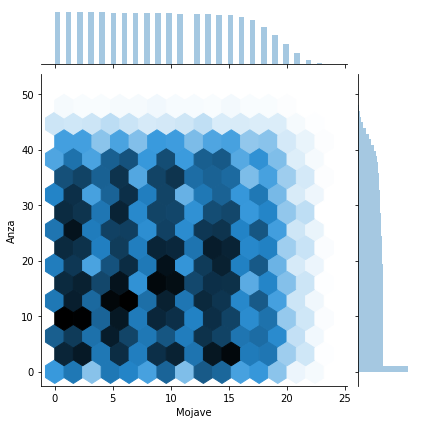

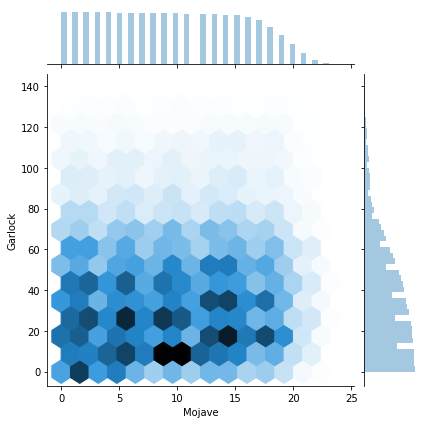

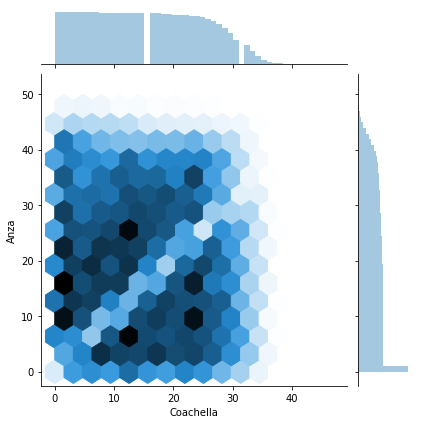

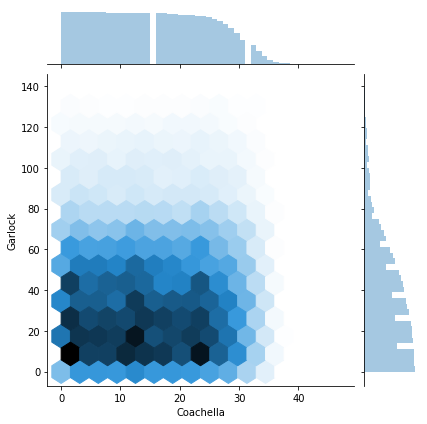

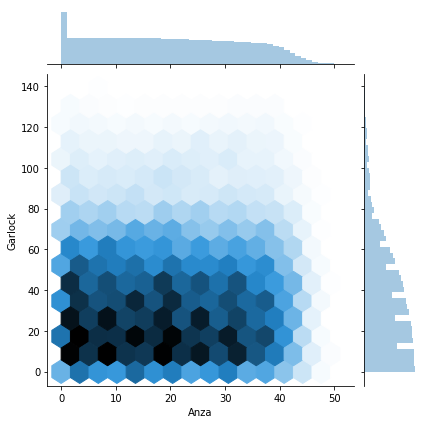

In [0]:
# This Seaborn chart is equivalent to Pandas's hexbin plot
import itertools

for pair in itertools.combinations(X.columns, 2):
  h=seaborn.jointplot(x=pair[0], y=pair[1], data=X, kind='hex', gridsize=15)

## Some more data exploration





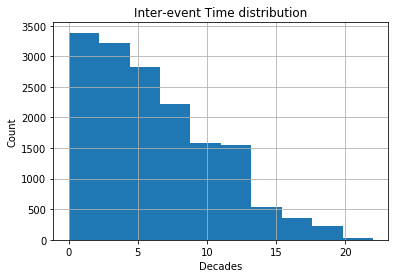

In [0]:
# get indices of rows that have a rupture
rupture_idx = X[X==0].dropna(how='all').index

# store as new dataframe
ruptures = X.reindex(rupture_idx)
ruptures.head()

# compute interevent-time distribution
ruptures['tidx'] = ruptures.index
ruptures['delta'] = (ruptures['tidx']-ruptures['tidx'].shift()).fillna(0)
ax=ruptures['delta'].hist()
h=ax.set_title('Inter-event Time distribution')
h=ax.set_xlabel('Decades')
h=ax.set_ylabel('Count')



#### View as Time Series

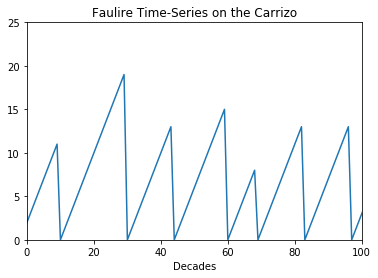

In [0]:
## Plot (Matplotlib)
ax=X.Carrizo.plot()
h=ax.set_xlabel('Decades')
h=ax.set_xlim([0,100])
h=ax.set_ylim([0,25])
h=ax.set_title('Faulire Time-Series on the Carrizo')